In [1]:
import pymysql
connection = pymysql.connect(host="localhost", port=3306,user="root",password="rita910226"
                        ,database="test1",cursorclass=pymysql.cursors.DictCursor)
TestA=[]
TestB=[]

with connection:
    with connection.cursor() as cursor:
        sql="""
        SELECT ApplicationDate, PublicationNumber FROM `f01l_patent`
        """
        cursor.execute(sql)
        results=cursor.fetchall()
        for j in results:
            if j['PublicationNumber'][2]=="1":
                TestA.append(1)
                
            elif j['PublicationNumber'][2]=="9":
                TestA.append(2)
                
            elif j['PublicationNumber'][2]=="8":
                TestA.append(3)
            
            elif j['PublicationNumber'][2]=="7":
                TestA.append(4)
            
            else :
                TestA.append(5)
                
        for j in results:
            if j['ApplicationDate'][3]=="0":
                TestB.append(1)
                
            elif j['ApplicationDate'][3]=="1":
                TestB.append(2)

            elif j['ApplicationDate'][3]=="2":
                TestB.append(3)
                
            elif j['ApplicationDate'][3]=="3":
                TestB.append(4)
                
            elif j['ApplicationDate'][3]=="4":
                TestB.append(5)
            
            elif j['ApplicationDate'][3]=="5":
                TestB.append(6)
            
            elif j['ApplicationDate'][3]=="6":
                TestB.append(7)
                
            elif j['ApplicationDate'][3]=="7":
                TestB.append(8)
                
            elif j['ApplicationDate'][3]=="8":
                TestB.append(9)
                
            elif j['ApplicationDate'][3]=="9":
                TestB.append(10)


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

List = []
l=[]
for i in range(len(TestA)):
    l=[]
    l.append(TestA[i])
    l.append(TestB[i])
    List.append(l)
    
a = np.array(List)
kmeans = KMeans(n_clusters=5, random_state=0).fit(a)
kmeans.cluster_centers_

array([[1.2247557 , 7.57763301],
       [2.55350066, 3.52047556],
       [3.29986053, 9.35704324],
       [1.95081967, 5.5442623 ],
       [2.92238806, 1.47462687]])

In [3]:
kmeans.labels_

array([0, 0, 3, ..., 3, 1, 1])

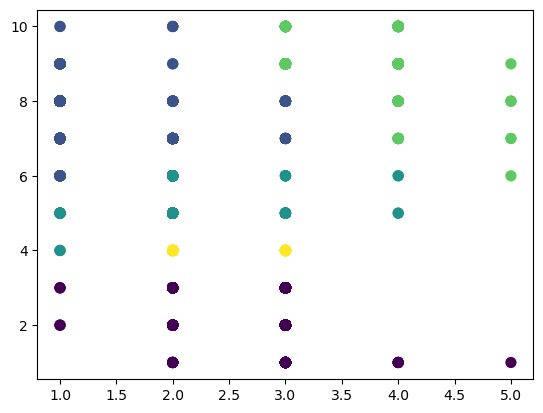

In [4]:
from sklearn.cluster import AgglomerativeClustering


Clus = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
Clus.fit_predict(a)
plt.scatter(a[:,0],a[:,1], c = Clus.fit_predict(a),s=50)


In [5]:
import pymysql
import pandas as pd
connection = pymysql.connect(host="localhost", port=3306,user="root",password="rita910226"
                        ,database="test1",cursorclass=pymysql.cursors.DictCursor)
TestA=[]
TestB=[]

k=1

with connection:
    with connection.cursor() as cursor:
        sql="""
        SELECT ApplicationDate, PublicationNumber, PublicationDate FROM `f01l_patent`
        """
        cursor.execute(sql)
        results=cursor.fetchall()
        for j in results:
            if j['PublicationNumber'][2]=="1":
                x = int (j['PublicationDate'][3])
                TestA.append(1 - x)
                
            elif j['PublicationNumber'][2]=="9":
                x = int (j['PublicationDate'][3])
                TestA.append(2 - 2*x)
                
            elif j['PublicationNumber'][2]=="8":
                x = int (j['PublicationDate'][3])
                TestA.append(3 + x)
            
            elif j['PublicationNumber'][2]=="7":
                x = int (j['PublicationDate'][3])
                TestA.append(4 + x)
            
            else :
                x = int (j['PublicationDate'][3])
                TestA.append(5 + 2*x)
                
        for j in results:
            if j['ApplicationDate'][3]=="0":
                TestB.append(k-4)
                
            elif j['ApplicationDate'][3]=="1":
                TestB.append(k-3)

            elif j['ApplicationDate'][3]=="2":
                TestB.append(k-2)
                
            elif j['ApplicationDate'][3]=="3":
                TestB.append(k-1)
                
            elif j['ApplicationDate'][3]=="4":
                TestB.append(k+1)
            
            elif j['ApplicationDate'][3]=="5":
                TestB.append(k+2)
            
            elif j['ApplicationDate'][3]=="6":
                TestB.append(k+3)
                
            elif j['ApplicationDate'][3]=="7":
                TestB.append(k+4)
                
            elif j['ApplicationDate'][3]=="8":
                TestB.append(k+5)
                
            elif j['ApplicationDate'][3]=="9":
                TestB.append(k+6)

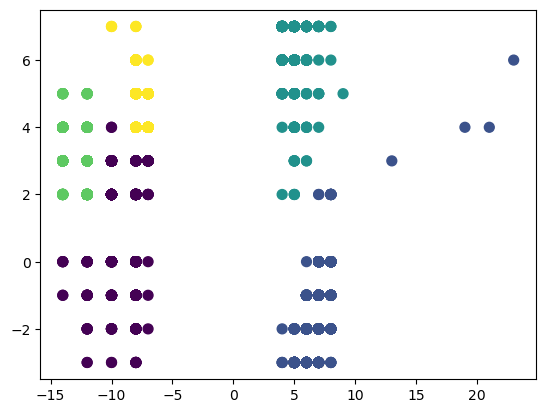

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

List = []
l=[]
for i in range(len(TestA)):
    l=[]
    l.append(TestA[i])
    l.append(TestB[i])
    List.append(l)
    
a = np.array(List)
kmeans = KMeans(n_clusters=5, random_state=0).fit(a)
kmeans.cluster_centers_
kmeans.labels_
from sklearn.cluster import AgglomerativeClustering


Clus = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
Clus.fit_predict(a)
plt.scatter(a[:,0],a[:,1], c = Clus.fit_predict(a),s=50)

In [7]:
import pymysql
import pandas as pd
connection = pymysql.connect(host="localhost", port=3306,user="root",password="rita910226"
                        ,database="test1",cursorclass=pymysql.cursors.DictCursor)


MOTOR=0
Technologies=0
ALL=0
OTHER=0

with connection:
    with connection.cursor() as cursor:
        sql="""
        SELECT AssigneeApplicant FROM `f01l_patent` WHERE AssigneeApplicant LIKE '%MOTOR%Technologies%'
        """
        cursor.execute(sql)
        results=cursor.fetchall()
        for j in results:
            ALL+=1
        print("ALL",ALL)
        
        sql="""
        SELECT AssigneeApplicant FROM `f01l_patent` WHERE AssigneeApplicant LIKE '%MOTOR%'
        """
        cursor.execute(sql)
        results=cursor.fetchall()
        for j in results:
            MOTOR+=1
        MOTOR = MOTOR - ALL
        print("MOTOR",MOTOR)
        
        sql="""
        SELECT AssigneeApplicant FROM `f01l_patent` WHERE AssigneeApplicant LIKE '%Technologies%'
        """
        cursor.execute(sql)
        results=cursor.fetchall()
        for j in results:
            Technologies+=1
        Technologies = Technologies -ALL
        print("Technologies",Technologies)
        
        sql="""
        SELECT AssigneeApplicant FROM `f01l_patent` WHERE AssigneeApplicant not LIKE '%MOTOR%' and AssigneeApplicant not LIKE
        '%Technologies%'
        """
        cursor.execute(sql)
        results=cursor.fetchall()
        for j in results:
            OTHER+=1
        print("OTHER",OTHER)

ALL 2
MOTOR 844
Technologies 787
OTHER 2347


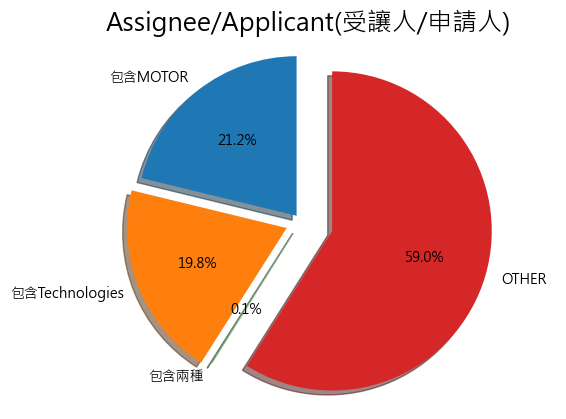

In [8]:
# 繁體包
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
# 繁體包
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '包含MOTOR', '包含Technologies', '包含兩種', 'OTHER'
sizes = [MOTOR, Technologies, ALL, OTHER]
explode = (0.05, 0.1, 0.05, 0.2)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Assignee/Applicant(受讓人/申請人)', {"fontsize" : 18})
plt.show()

In [9]:
import pymysql
import pandas as pd
connection = pymysql.connect(host="localhost", port=3306,user="root",password="rita910226"
                        ,database="test1",cursorclass=pymysql.cursors.DictCursor)
TestA=[]
K=65
k=97
count = 0

with connection:
    with connection.cursor() as cursor:
        sql="""
        SELECT AssigneeApplicant FROM `f01l_patent`
        """
        cursor.execute(sql)
        results=cursor.fetchall()
        for i in range(1,27):
            for j in results:
                if chr(K) == j['AssigneeApplicant'][0] or chr(k) == j['AssigneeApplicant'][0]:
                    count+=1
            TestA.append(count)
            count=0
            k+=1
            K+=1

print(TestA)

[204, 139, 159, 272, 162, 267, 247, 594, 62, 60, 89, 61, 295, 142, 77, 77, 1, 58, 542, 310, 16, 40, 47, 1, 44, 13]


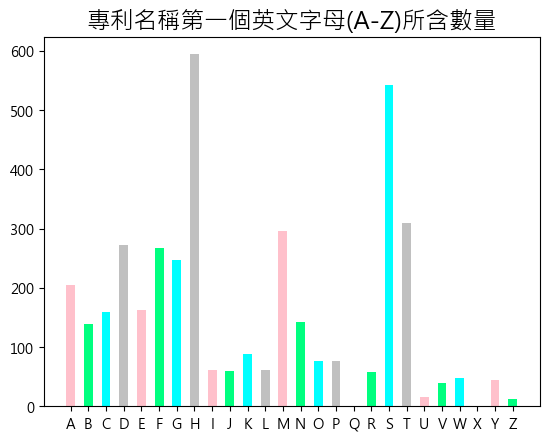

In [10]:
import matplotlib.pyplot as plt

k=65
x = []
for i in range(0,26):
    x.append(chr(k))
    k+=1
h = TestA
plt.title('專利名稱第一個英文字母(A-Z)所含數量', {'fontsize' : 17})
color = ['pink','springgreen','cyan','silver',
         'pink','springgreen','cyan','silver',
         'pink','springgreen','cyan','silver',
         'pink','springgreen','cyan','silver',
         'pink','springgreen','cyan','silver',
         'pink','springgreen','cyan','silver',
         'pink','springgreen']   # 顏色數據
plt.bar(x,h,color=color,width=0.5)  # 加入顏色、標籤和寬度參數
plt.show()
